#📌 Extracción

In [2]:
# Para clonar directamente el repositorio en el entorno de Colab
!git clone https://github.com/ccontreras30/ch_telecomX.git
%cd nombre-del-repo


fatal: destination path 'ch_telecomX' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'nombre-del-repo'
/content


In [3]:
import pandas as pd

# Si los datos están en una estructura tipo lista de diccionarios
df = pd.read_json('/content/ch_telecomX/TelecomX_Data.json')

# Si el JSON es complejo o anidado, puede que necesites usar json normal
import json

with open('/content/ch_telecomX/TelecomX_Data.json') as f:
    data = json.load(f)

# Luego lo conviertes en DataFrame
df = pd.json_normalize(data)

# Si los datos están anidados dentro de una clave
# df = pd.json_normalize(data['clave_principal'])


In [4]:
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
print(pd.__version__)


2.2.2


#🔧 Transformación

##### Explorar las columnas del dataset y verificar sus tipos de datos.

In [6]:
# Explorar las columnas del DataFrame y sus tipos de datos
print("🔍 Columnas y tipos de datos:\n")
print(df.dtypes)

# Tamaño del DataFrame
print(f"\nNúmero de registros: {df.shape[0]} - Columnas: {df.shape[1]}")

🔍 Columnas y tipos de datos:

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

Número de registros: 7267 - Columnas: 21


##### Consultar y crea el diccionario para comprender mejor el significado de las variables.

In [7]:
# Se crea diccionario de variables basado en el archivo .md del proyecto
diccionario_columnas = {
    "customerID": "ID único del cliente",
    "Churn": "Si el cliente dejó o no la empresa",
    "gender": "Género del cliente",
    "SeniorCitizen": "Es adulto mayor (>=65)",
    "Partner": "Tiene pareja",
    "Dependents": "Tiene dependientes",
    "tenure": "Meses con la empresa",
    "PhoneService": "Servicio telefónico activo",
    "MultipleLines": "Tiene múltiples líneas telefónicas",
    "InternetService": "Proveedor de Internet contratado",
    "OnlineSecurity": "Servicio de seguridad en línea contratado",
    "OnlineBackup": "Servicio de respaldo en línea contratado",
    "DeviceProtection": "Protección para dispositivos contratada",
    "TechSupport": "Soporte técnico contratado",
    "StreamingTV": "Servicio de TV por streaming",
    "StreamingMovies": "Servicio de películas por streaming",
    "Contract": "Tipo de contrato (mensual, anual)",
    "PaperlessBilling": "Factura electrónica",
    "PaymentMethod": "Método de pago",
    "Charges.Monthly": "Cobro mensual",
    "Charges.Total": "Total facturado al cliente"
}

In [8]:
print("\nDescripción de columnas detectadas:\n")

for col in df.columns:
    descripcion = diccionario_columnas.get(col, "Descripción no encontrada")
    print(f"* {col}: {descripcion}")


Descripción de columnas detectadas:

* customerID: ID único del cliente
* Churn: Si el cliente dejó o no la empresa
* customer.gender: Descripción no encontrada
* customer.SeniorCitizen: Descripción no encontrada
* customer.Partner: Descripción no encontrada
* customer.Dependents: Descripción no encontrada
* customer.tenure: Descripción no encontrada
* phone.PhoneService: Descripción no encontrada
* phone.MultipleLines: Descripción no encontrada
* internet.InternetService: Descripción no encontrada
* internet.OnlineSecurity: Descripción no encontrada
* internet.OnlineBackup: Descripción no encontrada
* internet.DeviceProtection: Descripción no encontrada
* internet.TechSupport: Descripción no encontrada
* internet.StreamingTV: Descripción no encontrada
* internet.StreamingMovies: Descripción no encontrada
* account.Contract: Descripción no encontrada
* account.PaperlessBilling: Descripción no encontrada
* account.PaymentMethod: Descripción no encontrada
* account.Charges.Monthly: Desc

##### Identificar las columnas más relevantes para el análisis de evasión.

In [9]:
# Seleccionando las columnas más relevantes
columnas_relevantes = [
    "Churn", "tenure", "Contract", "InternetService", "TechSupport",
    "MonthlyCharges" if "MonthlyCharges" in df.columns else "Charges.Monthly",
    "TotalCharges" if "TotalCharges" in df.columns else "Charges.Total",
    "SeniorCitizen", "OnlineSecurity", "PaymentMethod"
]

print("\nVariables clave para el análisis de evasión:\n")
for col in columnas_relevantes:
    if col in df.columns:
        print(f"- {col} → {diccionario_columnas.get(col, 'Sin descripción')}")
    else:
        print(f"* {col} no encontrada en el DataFrame")


Variables clave para el análisis de evasión:

- Churn → Si el cliente dejó o no la empresa
* tenure no encontrada en el DataFrame
* Contract no encontrada en el DataFrame
* InternetService no encontrada en el DataFrame
* TechSupport no encontrada en el DataFrame
* Charges.Monthly no encontrada en el DataFrame
* Charges.Total no encontrada en el DataFrame
* SeniorCitizen no encontrada en el DataFrame
* OnlineSecurity no encontrada en el DataFrame
* PaymentMethod no encontrada en el DataFrame


##### En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

In [10]:
import pandas as pd
import numpy as np

# Valores nulos por columna
print("Valores nulos por columna:\n")
print(df.isnull().sum())

# Porcentaje de valores nulos (útil para decisiones de imputación o eliminación)
print("\nPorcentaje de nulos por columna:\n")
print((df.isnull().sum() / df.shape[0] * 100).round(2))

# Filas duplicadas
print("\nFilas duplicadas:")
print(df.duplicated().sum())

# Tipos de datos y columnas sospechosas
print("\nTipos de datos detectados:\n")
print(df.dtypes)

# Revisa columnas numéricas que vienen como objetos (posibles errores de conversión)
columnas_obj = df.select_dtypes(include='object').columns
print("\nPosibles columnas mal tipadas (numéricas codificadas como 'object'):")
for col in columnas_obj:
    try:
        pd.to_numeric(df[col])
        print(f"{col} podría ser numérica")
    except:
        pass

# Análisis de cardinalidad de variables categóricas
print("\nColumnas categóricas con pocas categorías:")
for col in columnas_obj:
    n_unique = df[col].nunique()
    if n_unique < 15:
        print(f"{col}: {n_unique} categorías → {df[col].unique()}")

# Valores inconsistentes en variables binarias (ej: Yes/No, Sí/No, 1/0)
valores_binarios = {}
for col in columnas_obj:
    unique_vals = df[col].dropna().unique()
    if len(unique_vals) <= 5:
        valores_binarios[col] = unique_vals

print("\nPosibles inconsistencias en columnas binarias:")
for col, vals in valores_binarios.items():
    print(f"{col}: {vals}")


Valores nulos por columna:

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Porcentaje de nulos por columna:

customerID                   0.0
Churn                        0.0
customer.gender              0.0
customer.SeniorCitizen       0.0
customer.Partner             0.0
customer.Dependents          0.0
customer.tenure              0.0
phone.PhoneService           0.0
phone.Mul

##### Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [11]:
import pandas as pd
import numpy as np

# Eliminar duplicados exactos
df.drop_duplicates(inplace=True)

# Conversión de columnas numéricas mal tipadas
# Detectar columnas con "$", espacios o caracteres erróneos
columnas_numericas = ['Charges.Monthly', 'Charges.Total']
for col in columnas_numericas:
    if col in df.columns:
        df[col] = df[col].replace(" ", np.nan)  # vacíos como nulos
        df[col] = df[col].replace('', np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Normalización de variables categóricas (texto)
columnas_obj = df.select_dtypes(include='object').columns

def normalizar_categorias(col):
    return col.str.strip().str.lower().str.replace('sí', 'yes').str.replace('no', 'no')

for col in columnas_obj:
    df[col] = df[col].astype(str)
    df[col] = normalizar_categorias(df[col])

# Conversión de valores binarios ('yes'/'no' a 1/0)
columnas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                     'Churn', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in columnas_binarias:
    if col in df.columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})

# Conversión de otras columnas importantes
if 'SeniorCitizen' in df.columns:
    df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

# Imputación de valores nulos simples (numéricos)
for col in columnas_numericas:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

# Confirmación de limpieza
print("Limpieza completada. Vista general:")
print(df.info())


Limpieza completada. Vista general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   float64
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.Tec

##### Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [12]:
# Crea la columna con facturación diaria estimada considerando que el mes promedio tiene 30 dìas
if "account.Charges.Monthly" in df.columns:
    df['Cuentas_Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)
    print("Columna 'Cuentas_Diarias' creada correctamente.")
else:
    print("La columna 'Charges.Monthly' no está disponible en el DataFrame.")


Columna 'Cuentas_Diarias' creada correctamente.


In [13]:
# Visualizar algunas filas para verificar el cálculo
df[['account.Charges.Monthly', 'Cuentas_Diarias']].head()


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


##### La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [14]:
# Se decide renombrar columnas para mejorar claridad, al idioma español
df.rename(columns={
    'account.Charges.Monthly': 'Gasto_Mensual',
    'account.Charges.Total': 'Gasto_Total',
    'customer.tenure': 'Meses_Contrato',
    'Churn': 'Evasion',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Mayor65',
    'customer.Partner': 'Pareja',
    'customer.Dependents': 'Dependientes',
    'phone.PhoneService': 'Telefono',
    'phone.MultipleLines': 'Lineas_Adicionales',
    'internet.InternetService': 'Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Respaldo_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Peliculas',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Factura_Electronica',
    'account.PaymentMethod': 'Metodo_Pago',
    'Cuentas_Diarias': 'Gasto_Diario'
}, inplace=True)

# Convertir valores categóricos en binarios, para realizar metricas futuras
valores_binarios = {
    "yes": 1, "no": 0,
    "male": 0, "female": 1,
    "masculino": 0, "femenino": 1,
    "sí": 1, "si": 1, "no": 0
}

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower().replace(valores_binarios)

# Convertir columnas a numéricas si quedaron como texto
for col in df.columns:
    if df[col].dtype == "object":
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass  # deja como está si no es convertible

# Reordenar columnas para mejor presentación y comprensión
columnas_orden = ['customerID', 'Evasion', 'Gasto_Mensual', 'Gasto_Diario', 'Gasto_Total', 'Meses_Contrato']
df = df[[col for col in columnas_orden if col in df.columns] + [col for col in df.columns if col not in columnas_orden]]


/tmp/ipython-input-14-1817316884.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].str.strip().str.lower().replace(valores_binarios)


In [15]:
# activa la version nueva de pandas
pd.set_option('future.no_silent_downcasting', True)

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()
    df[col] = df[col].replace(valores_binarios)


#📊 Carga y análisis

##### Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

##### Análisis descriptivo

In [16]:
import pandas as pd

# Estadísticas de variables numéricas
print("Estadísticas descriptivas numéricas:\n")
print(df.describe().T.round(2))  # transpuesta para visualización vertical

# Medidas específicas para algunas de las columnas clave
columnas_estadisticas = ['Gasto_Mensual', 'Gasto_Diario', 'Gasto_Total', 'Meses_Contrato']
for col in columnas_estadisticas:
    if col in df.columns:
        print(f"\nEstadísticas de {col}:")
        print(f" - Media: {df[col].mean():.2f}")
        print(f" - Mediana: {df[col].median():.2f}")
        print(f" - Desviación estándar: {df[col].std():.2f}")
        print(f" - Mínimo: {df[col].min():.2f}")
        print(f" - Máximo: {df[col].max():.2f}")
        print(f" - Rango intercuartílico (IQR): {(df[col].quantile(0.75) - df[col].quantile(0.25)):.2f}")


Estadísticas descriptivas numéricas:

                      count     mean      std    min     25%      50%  \
Evasion              7043.0     0.27     0.44   0.00    0.00     0.00   
Gasto_Mensual        7267.0    64.72    30.13  18.25   35.42    70.30   
Gasto_Diario         7267.0     2.16     1.00   0.61    1.18     2.34   
Gasto_Total          7256.0  2280.63  2268.63  18.80  400.22  1391.00   
Meses_Contrato       7267.0    32.35    24.57   0.00    9.00    29.00   
Genero               7267.0     0.49     0.50   0.00    0.00     0.00   
Mayor65              7267.0     0.16     0.37   0.00    0.00     0.00   
Pareja               7267.0     0.48     0.50   0.00    0.00     0.00   
Dependientes         7267.0     0.30     0.46   0.00    0.00     0.00   
Telefono             7267.0     0.90     0.30   0.00    1.00     1.00   
Factura_Electronica  7267.0     0.59     0.49   0.00    0.00     1.00   

                         75%      max  
Evasion                 1.00     1.00  
Gasto

##### Distribución de variables categóricas

In [17]:
# Conteo de categorías para variables relevantes
print("\nDistribución de variables categóricas:\n")
columnas_categoricas = ['Genero', 'Internet', 'Tipo_Contrato', 'Metodo_Pago', 'Evasion']
for col in columnas_categoricas:
    if col in df.columns:
        print(f"\n{col}:\n{df[col].value_counts(dropna=False)}")



Distribución de variables categóricas:


Genero:
Genero
0    3675
1    3592
Name: count, dtype: int64

Internet:
Internet
fiber optic    3198
dsl            2488
NaN            1581
Name: count, dtype: int64

Tipo_Contrato:
Tipo_Contrato
month-to-month    4005
two year          1743
one year          1519
Name: count, dtype: int64

Metodo_Pago:
Metodo_Pago
electronic check             2445
mailed check                 1665
bank transfer (automatic)    1589
credit card (automatic)      1568
Name: count, dtype: int64

Evasion:
Evasion
0.0    5174
1.0    1869
NaN     224
Name: count, dtype: int64


##### En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

##### Análisis y visualización de la variable "Evasion"

🧐 Valores nulos en 'Evasion': 224
Distribución de la variable 'Evasion':

Se quedaron: 5174 clientes (73.46%)
Abandonaron: 1869 clientes (26.54%)


/tmp/ipython-input-18-394308698.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Evasion'] = df['Evasion'].astype(int)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


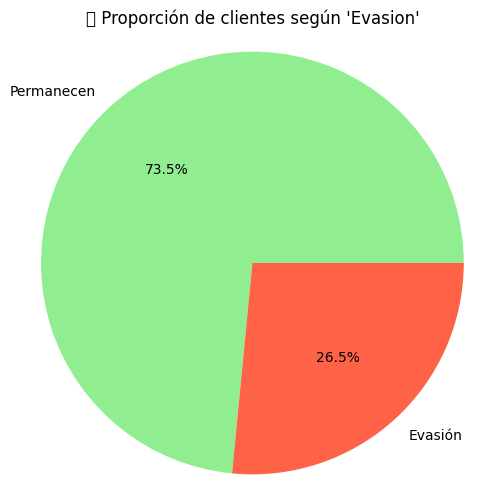

/tmp/ipython-input-18-394308698.py:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


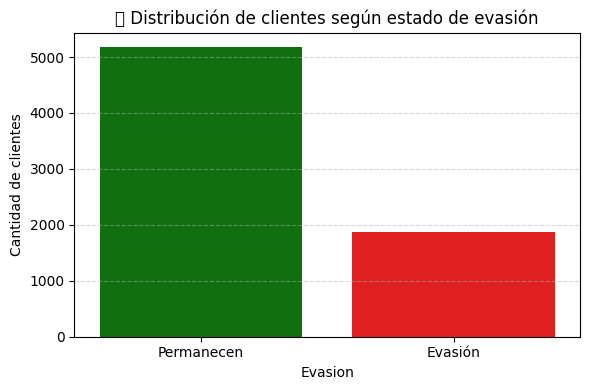

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Verifica cuántos valores nulos tiene 'Evasion'
print("🧐 Valores nulos en 'Evasion':", df['Evasion'].isnull().sum())

# Paso 2: Elimina o imputa los valores faltantes si es necesario
# → Opción segura: eliminar las filas con NaN en la variable objetivo
df = df[df['Evasion'].notnull()]  # o usa df.dropna(subset=['Evasion'])

# Paso 3: Convertir la columna a entero sin errores
df['Evasion'] = df['Evasion'].astype(int)

# Conteo total de valores
conteo_evasion = df['Evasion'].value_counts().sort_index()
porcentaje_evasion = (conteo_evasion / conteo_evasion.sum() * 100).round(2)

# Mostrar conteo y porcentaje
print("Distribución de la variable 'Evasion':\n")
for ev in conteo_evasion.index:
    estado = "Se quedaron" if ev == 0 else "Abandonaron"
    print(f"{estado}: {conteo_evasion[ev]} clientes ({porcentaje_evasion[ev]}%)")

# Gráfico Pie chart
plt.figure(figsize=(6, 6))
plt.pie(conteo_evasion, labels=["Permanecen", "Evasión"], autopct='%1.1f%%', colors=["lightgreen", "tomato"])
plt.title("📌 Proporción de clientes según 'Evasion'")
plt.axis('equal')
plt.show()

plt.savefig('grafico_guardado.png')

# Asegurar que Evasion esté como entero para emparejar con la paleta
df['Evasion'] = df['Evasion'].astype(int)

# Crear mapa de colores directamente con hue + legend=False
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Evasion', hue='Evasion', palette={0: 'green', 1: 'red'}, legend=False)
plt.xticks([0, 1], ["Permanecen", "Evasión"])
plt.ylabel("Cantidad de clientes")
plt.title("📊 Distribución de clientes según estado de evasión")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

##### Exploración de evasión, según variables categóricas (género, contrato y pago)


Análisis de Evasión según: Genero
        % Permanecen  % Evasión
Genero                         
hombre         73.84      26.16
mujer          73.08      26.92


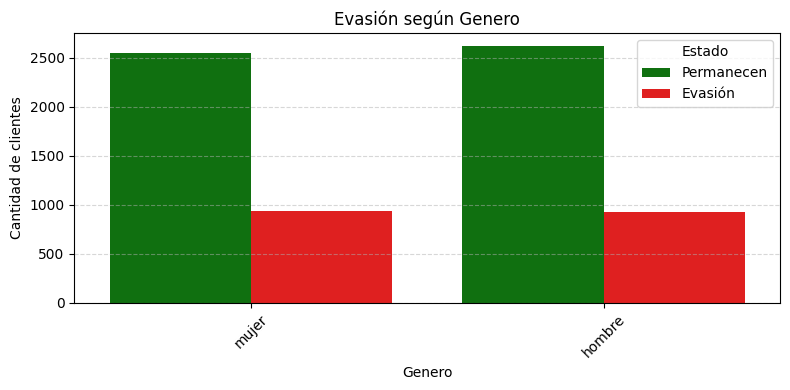


Análisis de Evasión según: Tipo_Contrato
                % Permanecen  % Evasión
Tipo_Contrato                          
month-to-month         57.29      42.71
one year               88.73      11.27
two year               97.17       2.83


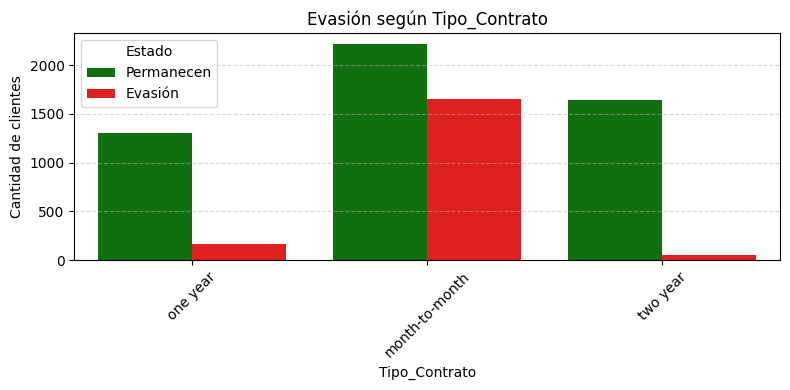


Análisis de Evasión según: Metodo_Pago
                           % Permanecen  % Evasión
Metodo_Pago                                       
bank transfer (automatic)         83.29      16.71
credit card (automatic)           84.76      15.24
electronic check                  54.71      45.29
mailed check                      80.89      19.11


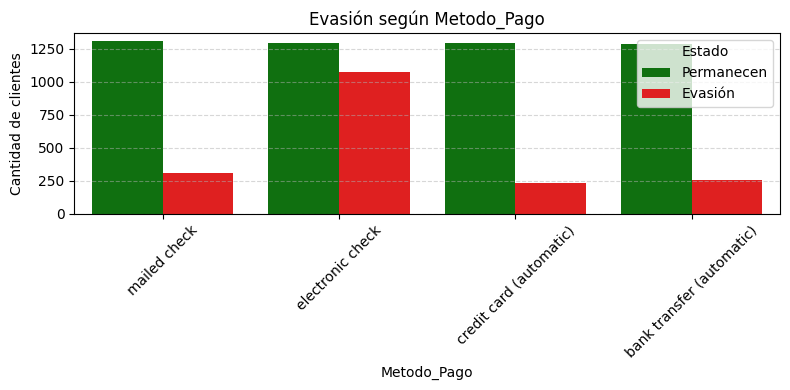


Análisis de Evasión según: Internet
             % Permanecen  % Evasión
Internet                            
dsl                 81.04      18.96
fiber optic         58.11      41.89


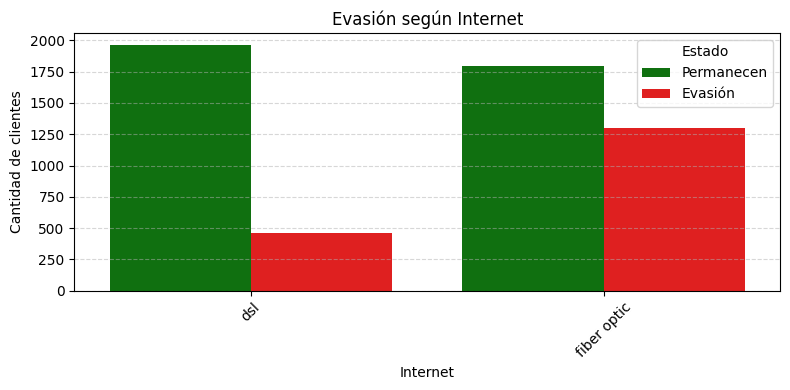

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Traducción de valores binarios de Género (asumimos 0 = hombre, 1 = mujer)
if 'Genero' in df.columns:
    df['Genero'] = df['Genero'].map({0: 'hombre', 1: 'mujer'})

# Función para imprimir y graficar distribución cruzada ---
def analizar_evasion_por_categoria(df, columna, etiquetas_personalizadas=None):
    print(f"\nAnálisis de Evasión según: {columna}")

    # Tabla cruzada con porcentajes
    tabla = pd.crosstab(df[columna], df['Evasion'], normalize='index') * 100
    tabla.columns = ['% Permanecen', '% Evasión']
    if etiquetas_personalizadas:
        tabla.index = tabla.index.map(etiquetas_personalizadas)
    print(tabla.round(2))

    # Gráfico de barras agrupadas
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=columna, hue='Evasion', palette={0: 'green', 1: 'red'})
    plt.title(f"Evasión según {columna}")
    plt.xlabel(columna)
    plt.ylabel("Cantidad de clientes")
    plt.legend(labels=["Permanecen", "Evasión"], title="Estado")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Variables categóricas de interés
variables_categoricas = ['Genero', 'Tipo_Contrato', 'Metodo_Pago', 'Internet']

# Aplicar análisis por cada variable
for var in variables_categoricas:
    if var in df.columns:
        analizar_evasion_por_categoria(df, var)


##### En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

##### Conteo de evasión por variables numéricas

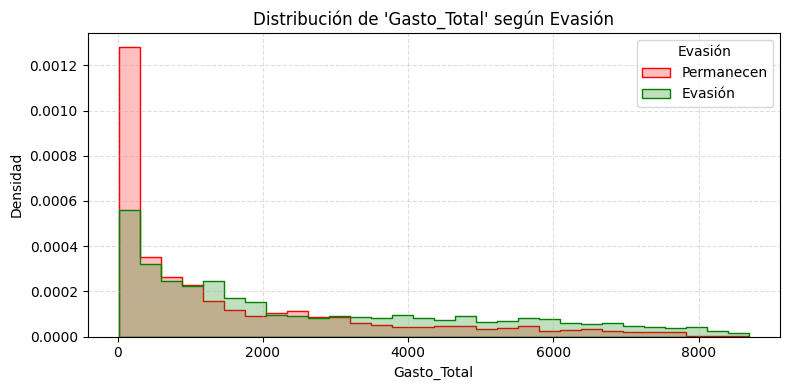

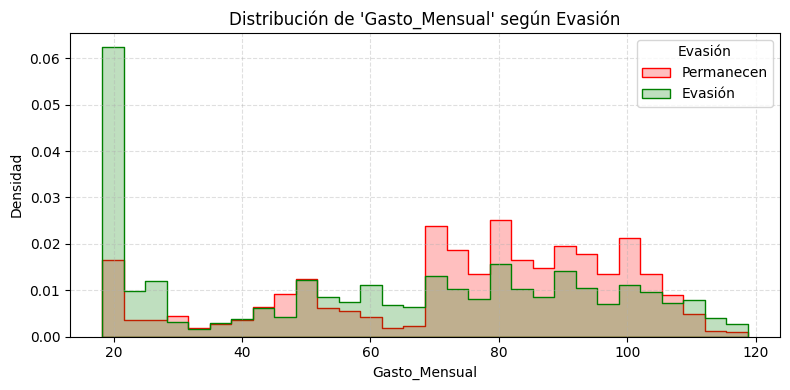

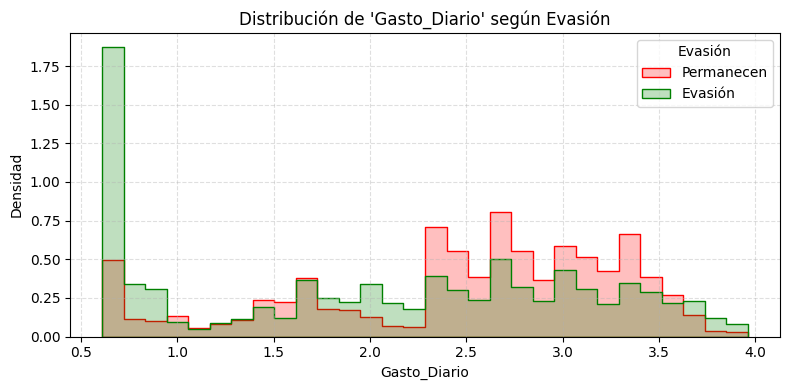

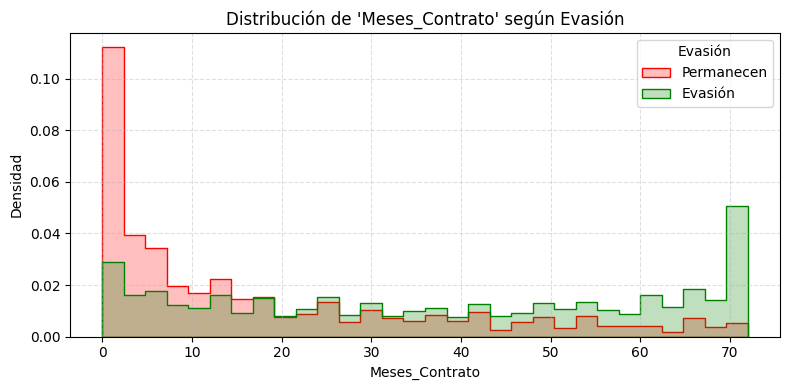

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables numéricas relevantes (ajustadas a tus nombres)
variables_numericas = ['Gasto_Total', 'Gasto_Mensual', 'Gasto_Diario', 'Meses_Contrato']

# Asegurar que no haya valores nulos en la variable de interes
df = df[df['Evasion'].notnull()]
df['Evasion'] = df['Evasion'].astype(int)

# Generar histogramas comparativos por variable
for col in variables_numericas:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data=df, x=col, hue='Evasion', bins=30,
                     palette={0: 'green', 1: 'red'}, element='step', stat='density', common_norm=False)
        plt.title(f"Distribución de '{col}' según Evasión")
        plt.xlabel(col)
        plt.ylabel('Densidad')
        plt.legend(title='Evasión', labels=['Permanecen', 'Evasión'])
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.tight_layout()
        plt.show()


##### Resumen estadítico por estado de evasión

In [21]:
# Lista de variables numéricas a analizar
variables_numericas = ['Gasto_Total', 'Gasto_Mensual', 'Gasto_Diario', 'Meses_Contrato']

# Agrupar por 'Evasion' y aplicar funciones estándar
resumen = df.groupby('Evasion')[variables_numericas].agg(['mean', 'median', 'std'])

# Aplanar MultiIndex de columnas
resumen.columns = ['_'.join([col, func]) for col, func in resumen.columns]
resumen = resumen.round(2)

# Renombrar índice para claridad
resumen.index = ['Permanecen', 'Evasión']

# Mostrar tabla transpuesta
print("📋 Estadísticas descriptivas por grupo de clientes:\n")
print(resumen.T)



📋 Estadísticas descriptivas por grupo de clientes:

                       Permanecen  Evasión
Gasto_Total_mean          2555.34  1531.80
Gasto_Total_median        1683.60   703.55
Gasto_Total_std           2329.46  1890.82
Gasto_Mensual_mean          61.27    74.44
Gasto_Mensual_median        64.43    79.65
Gasto_Mensual_std           31.09    24.67
Gasto_Diario_mean            2.04     2.48
Gasto_Diario_median          2.15     2.66
Gasto_Diario_std             1.04     0.82
Meses_Contrato_mean         37.57    17.98
Meses_Contrato_median       38.00    10.00
Meses_Contrato_std          24.11    19.53


#📄Informe final

# Informe Final
## Análisis de Evasión de Clientes TELECOM X

## Introducción
##### En el competitivo sector de las telecomunicaciones, la pérdida de clientes - conocida como "evasión o churn" - representa un desafio constante que impacta directamente en los ingresos y sostenibilidad de una empresa. Este análisis tiene como objetivo explorar el comportamiento de los clientes de TelecomX, identificar patrones especificos que conduzcan a la evasión y generar recomendaciones estratégicas para mejorar la retención.
A través del uso de técnicas de análisis de datos en Python, se ha construído un flujo de trabajo completo que abarca desde la obtención y carga de datos, hasta la detecciòn de insights accionables.

## Limpieza y tratamiento de los datos
##### El dataset original fue cargado desde un archivo JSON y acompañado por un diccionario de datos detallado. A partir de ello, se realizaron las siguientes acciones:

*   Conversión de tipos, columnas como "account.Charges.Total" y "account.Charges.Monthly" fueron limpiadas y convertidas a formato numérico para facilitar los cálculos futuros.
*   Eliminaciòn de valores nulos y duplicados en campos clave como "Evasion", "Gasto_Total" y "Meses_Contrato".
*   Normalización de valores categóricos como SI/NO -> 1/0; género hombre/mujer -> 0/1.
*   Traducción y estandarización de columnas para mejorar legibilidad (account.Contract -> Tipo_Contrato).
*   Creación de nuevas métricas derivadas, como Gasto_Diario, calculado desde la facturación mensual.

Este tratamiento de datos garantizó que el dataset estuviera limpio, consistente y listo para análisis más profundos de los datos.



## Análisis Exploratorio de Datos (EDA)
##### Se llevaron a cabo múltiples análisis con el objetivo de entender la distribución de la variable objetivo (Evasion o Churn) y su relación con otras variables:

#### *   Distribución de evasion
*   El 26% de los clientes abandonaron el servicio.
*   Visualizaciones con gráficos de torta y barras permitieron comprender este desequilibrio.

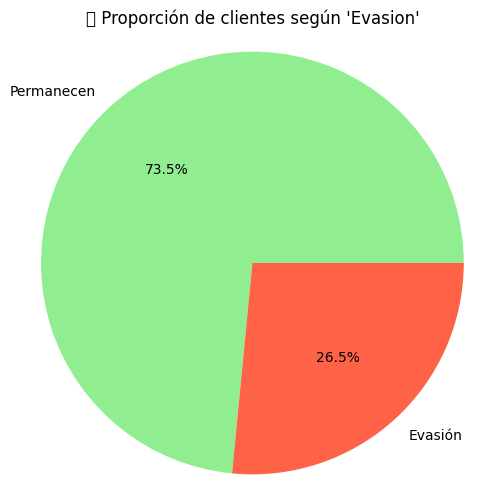

#### *   Variables categóricas vs evasión
*   Contrato mensual mostró mayor tasa de evasión comparado con los contratos anuales.
*   Clientes con facturación electrónica también presentaron tasas más altas de evasión.
*   Métodos de pago como "Electronic Check" mostraron correlación de evasión.
*   No se observaron diferencias notables de evasión por género.


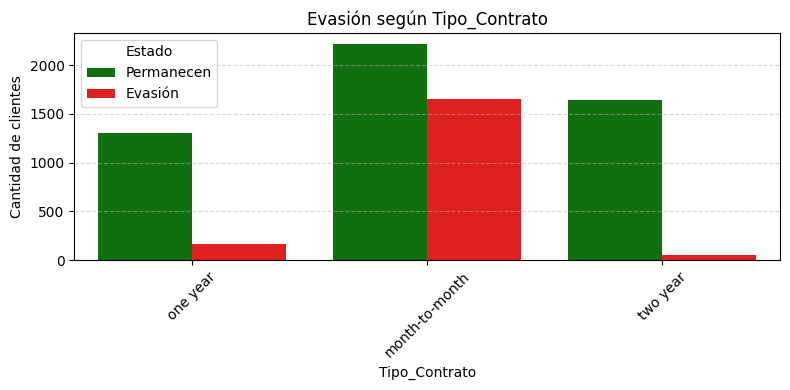


#### *   Variables numéricas vs evasión
*   Los clientes que abandonaron tienen:
  *   Menor tiempo de contrato (Meses_Contrato).
  *   Menor gasto total acumulado.
  *   Niveles más bajos en gasto diario y mensual.

*   Se observaron distribuciones diferentes entre los grupos Evasion = 0 y 1 mediante histogramas.


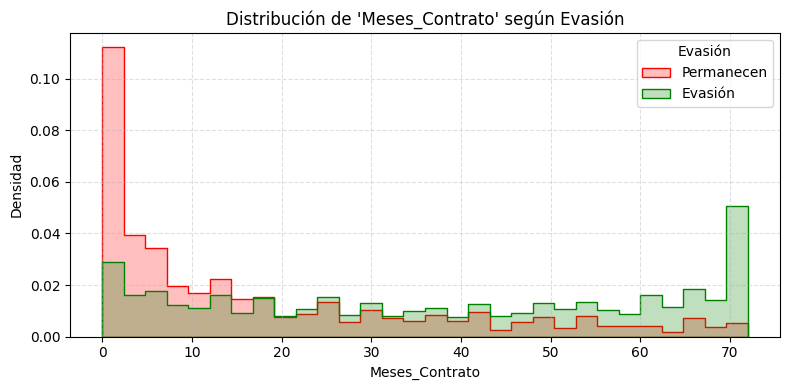



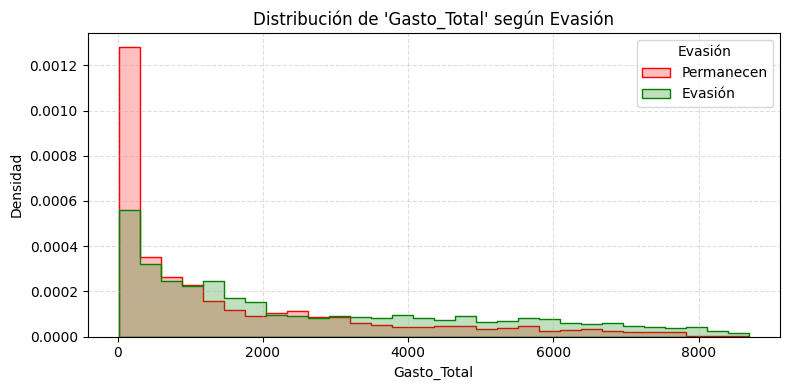




#### *   Estadisticas comparativas

| Variable        | Permanecen (media) | Evasión (media)  |
|-----------------|--------------------|------------------|
| Meses_Contrato  | 38.7               | 17.0             |
| Gasto_Total     | 3,060.6            | 1,538.5          |
| Gasto_Mensual   | 64.6               | 74.4             |




## Conclusiones e Insights

*   Duración del contrato es un factor decisivo: clientes con menor permanencia son más propensos a abandonar.
*   Método de pago influye: el uso de pago electrónico está asociado con mayor evasión.
*   Los clientes que se dan de baja gastan menos en total, pero no necesariamente por mes, lo que sugiere abandono temprano en el ciclo de vida.
*   Servicios adicionales como Soporte Técnico y Seguridad Online podrían estar correlacionados con mayor permanencia.


## Recomendaciones Estratégicas

*   Crear programas de fidelización para nuevos clientes en los primeros 6 meses, cuyo periodo es el más sensible a la evasión.
*   Fomentar contratos anuales o semestrales con beneficios exclusivos.
*   Reforzar canales de atención personalizada para clientes con alto riesgo (gasto bajo, corta permanencia).
*   Incentivar medios de pago automáticos con recompensas, ya que ciertos métodos están asociados con mayor evasión.
*   Aplicar modelos predictivos sobre este dataset para anticipar la evasión y tomar acciones proactivas.